## MNIST CNN

MNIST is a dataset in fastai library and we will train a model to recognize handwritten digits,as in the presentation,we will solve it **not with transfer learning but from scratch.** It is inspired by fast.ai and the instructor-mentor of the course Jeremy Howard. I will try to combine the theory that is in the presenation and apply it to this example.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
from fastai.basics import os

In [5]:
os.getcwd() #this is the path that I am now

'/home/jupyter/tutorials/fastai/course-v3/nbs/dl1'

### Data

MNIST is a dataset from fastai so I can call it with URLs. How can I see the availiable datasets in fastai? (https://course.fast.ai/datasets )

In [6]:
path = untar_data(URLs.MNIST) #change the path to where the MNIST dataset is

In [7]:
path

PosixPath('/home/jupyter/.fastai/data/mnist_png')

Due to the fact that the dataset is in the library we don't have to create training & testing dataset but is included in two seperate folders.

In [8]:
path.ls() #in my path, in mnist dataset there is a training and a testing dataset

[PosixPath('/home/jupyter/.fastai/data/mnist_png/models'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing')]

 **what kind of item list do you have?** In this case it's an item list of images(**ImageList**).We have also other kinds check fastai library. 
 **From where are we getting the list of FILE NAMES?** In this case, by looking in the folder so we use **from_folder**(As we have 10 folders each of these are called **"0" and contains the zeros, "1" and contains the ones** etc..).
 **convert_mode='L'** makes images black and white, there is also option like 'RGB' if we want the colour images.

In [9]:
il = ImageList.from_folder(path, convert_mode='L')

In [10]:
il.items[0] 

PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9/39781.png')

**items** attribute is about to check what we have. So the first file name is from the folder 9 in the training folder, the picture 39781.png in the path /home/jupyter/.fastai/data/mnist_png

In [11]:
defaults.cmap='binary' #In this case, we want to use a binary color map, black and white.

In [32]:
il #So our dataset hs 70.000 items, each is an image with dimention 28x28 and 1 channel because they are black and white, and
#they are located in Path.

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png

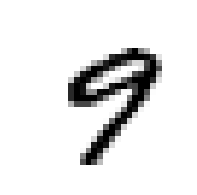

In [12]:
il[0].show() #the first image that we had. 

Now it's time to define **which is the training and validation datasets**(which are given in our dataset in seperate folders but we have to define which are they. There are also other options to split the dataset, dependen on the situation, check fastai library. **The fact is that we have to define training & validation in every proccess**

In [13]:
sd = il.split_by_folder(train='training', valid='testing') 

In [34]:
sd #so Train dataset has 60.000 items and validation set has 10.000 items, i.e. items=files NOT the actual images.

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [36]:
(path/'training').ls() #so in the training set there are 10 folders each of them contain the corresponding images.

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3')]

In [14]:
ll = sd.label_from_folder() #We give labels to the items from the folder that they are in. i.e ll=label list

In [40]:
ll #So we have labellist: 60.000 items which x is the imagelist and y is the categorylist. In this case the first 5 items(Imagelist) 
#are given and also their category(categorylist) which is 9. The same for validation set.

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [15]:
x,y = ll.train[0] #index into the label list to declare x(independent variable) and y(depended variable) for the first item.
#i.e. y is the thing we want to predict.

9 torch.Size([1, 28, 28])


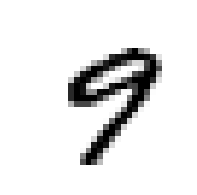

In [16]:
x.show() #x is an image object which I can show
print(y,x.shape) #y is a category object which i will print

 **Next thing we can do is to add transforms**. Very important step. I'll use **rand_pad** which 
actually returns two transforms: **the padding and the random crop.** 
So we have to use  star **(*)** to say put both these transforms in this list. We can not use other transforms
like zoom, flip etc.. because it will affect a lot those small digit images. **The empty array ( []) refers to the validation set transforms.**

In [17]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], []) 

In [18]:
ll = ll.transform(tfms) #Now we call transform 

**Next step we will work with data batches. So we pick a batch size and choose data bunch.**

In [19]:
bs = 128 

In [48]:
bs

128

**also we normalize.** In this case, we're not using a pre-trained model, so we don't use ImageNet stats here.
**So I call normalize like this without passing in stats and it will grab a batch of data at random and use that to decide what normalization stats to use.** That's a good idea if you're not using a pre-trained model.
**WHAT IS NORMALIZATION?** If we had a pre-trained model we would use ImageNet statistics. **Normalization involves subtracting the mean (of ImageNet dataset) from the pixel intensity values and dividing the result by standard deviation (of ImageNet dataset).**

In [20]:
# not using imagenet_stats because we are not using pretrained model
data = ll.databunch(bs=bs).normalize()

9


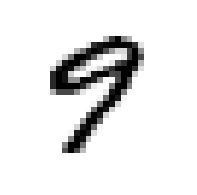

In [54]:
x,y = data.train_ds[0] #train and train_ds is the same in fastai library. 
x.show()
print(y)

So we've got a **data bunch** and in that data bunch is a data set which we've seen already. **What is interesting is that the training data set now has data augmentation because we've got transforms.** **WHAT IS DATA AUGMENTATION?Data augmentation is a way of creating new ‘data’ with different orientations** 
plot_multi is a fastai function that will plot the result. **So in this case, my function just grab the first image from the training set and because each time you grab something from the training set, it's going to transform on th fly.** HOW MANY TRANSFORMED VERSIONS OF THE IMAGE WE CREATE?infinite. **Each time we grab one thing from the data set, we do a random transform on the fly, so potentially every one will look a little bit different.** So if we plot the result of that lots of times, we get 9's in slightly different positions because we did **random padding** transform.

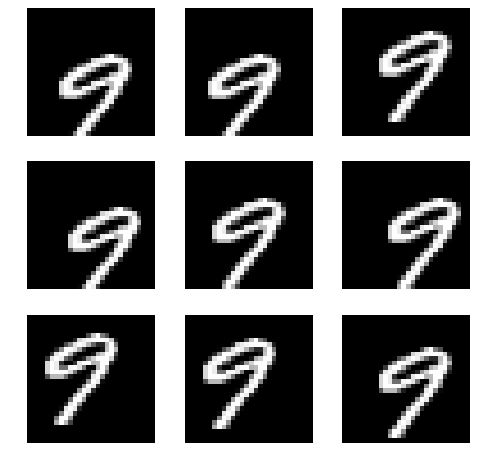

In [22]:
def pplot(i,j,ax): data.train_ds[0].show(ax, cmap='gray') # Internally, it creates 3 times 3 subplots(so 3 cols and 3 rows), 
#assigned into ax(axes) 
#and then loops through the axes to create a plot with the func. With gray cmap I have this outcome
#with 'binary' I have white fondo and black digits.
plot_multi(pplot, 3, 3, figsize=(8,8))

**We can then grab a X batch and a Y batch, look at their shape - batch size by channel by row by column**

In [23]:
xb,yb = data.one_batch() 
xb.shape,yb.shape #we have a data bunch of 128 images each of them are 28x28 sized and 1 channel(grayscale images) and 128 labels 
#one for each of the 128 images.

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

**Why is different the colour? Because out of the pplot function, the feature map was 'binary'=black & wight.**

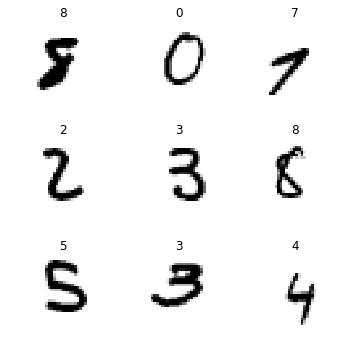

In [24]:
data.show_batch(rows=3, figsize=(5,5)) 

### Basic CNN with batchnorm

We are ready to create the CNN model.

The input is 28 by 28. In this case, all of my convolution is going to be **kernel size 3, stride 2, padding 1. So I will create a simple function using Conv2d of fastai library to do a conv with those parameters.** Kernel size=filter matrix size, padding= add 0s arround the image so now we will add a row-col of 0s arround images, stride is the "step" that we do the calculations in the multiplication weights*kernel.

In [25]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

Complex neural networks are easily built using **container classes** and specifically **Sequential : plugs layers in a feed-forward fully connected manner**. WHAT IS CONTAINER? Containers are **any object that holds an arbitrary number of other objects.** Generally, **containers provide a way to access the contained objects and to iterate over them**. Examples are lists, tuples etc..

In [30]:
model = nn.Sequential( #Sequential provides a way to plug layers together in a feed-forward fully connected manner.
    conv(1, 8), # 14x14 feature map. We start with image grayscale 28x28 size. And we choose how many kernels we want.
    nn.BatchNorm2d(8), #We do batchnorm
    nn.ReLU(), #we do ReLU
    conv(8, 16), # 7x7 feature map with 8 channels and 16 kernels
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4x4 feature map with 16 channels and 32 kernels
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2x2 feature map with 32 channels and 16 kernels
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1x1 feature map with 10 kernels. !! It's not a vector of length 10, it's a rank 3 tensor of 10 by 1 by 1!!
    #but our loss function remember that waits for a vector to compare.
    nn.BatchNorm2d(10), 
    Flatten()     # So do flatten.
)

**That's how we can create a CNN. Then we can return that into a learner by passing in the data and the model and the loss function and optionally some metrics. We're going to use cross-entropy loss.**

In [31]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [32]:
print(learn.summary()) # We call summary to check, param are the weights.

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
______________________________________________________________

**we grab that mini batch of X that we created earlier (a mini batch of X), pop it onto the GPU and call the model directly. It gives us back as we wanted a 128 by 10 result.**

In [33]:
xb = xb.cuda()

In [34]:
model(xb).shape

torch.Size([128, 10])

In [35]:
learn.lr_find(end_lr=100) #find the learning rate η automatically.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


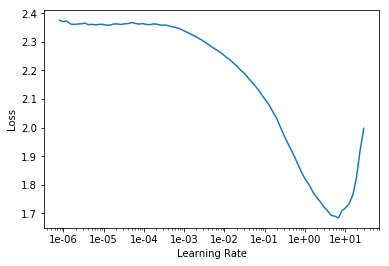

In [36]:
learn.recorder.plot() #plot the loss when η is increasing. We see that the loss(Cost) is the less for learning rate 0.1

In [37]:
learn.fit_one_cycle(3, max_lr=0.1) #so we set max_lr=0.1 and we do 3 epochs of training.(Train the mini batch with SGD, then pick
#an other mini batch and do the same, then an other, until we exhaust the training inputs.

epoch,train_loss,valid_loss,accuracy,time
0,0.232411,0.144988,0.956200,00:51
1,0.140543,0.134221,0.957200,00:05
2,0.076965,0.043637,0.986200,00:05


After 3 epochs of training(3 times fit the weights with SGD for all mini batces in the train set) we have accuracy of 0.986! **With a no pretrained model in 00.05'' time!**

### FASTAI cnn

**Rather than saying conv, batch norm, ReLU all the time, fast.ai already has something called conv_layer which lets you create conv, batch norm, ReLU combinations.**

In [38]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [41]:
model = nn.Sequential(
    conv2(1, 8),   # 14
    conv2(8, 16),  # 7
    conv2(16, 32), # 4
    conv2(32, 16), # 2
    conv2(16, 10), # 1
    Flatten()      #10dim vector
)

Exactly the same NN, and is following the same process:

In [42]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [43]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.250211,0.156974,0.950100,00:05
1,0.192594,0.118892,0.960200,00:05
2,0.169263,0.130904,0.961300,00:05
3,0.141255,0.086806,0.972200,00:05
4,0.121607,0.098161,0.970700,00:05
5,0.108172,0.063131,0.980600,00:05
6,0.080066,0.069777,0.978200,00:05
7,0.062264,0.037971,0.988300,00:05
8,0.049717,0.030939,0.990300,00:05
9,0.045198,0.028726,0.990500,00:05


We reached 0.99% accuracy! 

### How can we improve it more? 

**Using Residual Learning Network. -> Not part of this presentation.**